In [5]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [6]:
#Q1: Let the standard deviation of your income process be σ = 0.1, let the persistence be ρ = 0.2,
#let the long-run growth rate of income be g = 0.03, and let the average initial income be inc0 = $80, 000.
#Assume you will work for 40 years after you graduate (2019 to 2058). Simulate 10,000 different
#realizations of your lifetime income. Do this by first drawing 10,000 sets of 40 normally distributed
#errors with mean 0 and standard deviation σ = 0.1. Then plug those into the income process defined
#above to simulate your lifetime income. Plot one of the lifetime income paths. Make sure your axes are
#correctly labeled and your plot has a title

In [7]:
#set up a simulation function

In [9]:
def income_sim(inc0,g,mu,sigma,rho,w_year,num_draws):

    np.random.seed(5)

    random_errors = np.random.normal(mu, sigma, (w_years,num_draws)) 
   
    lnc_mat = np.zeros((w_years, num_draws))
        
    lnc_mat[0, :] = np.log(inc0) + random_errors[0, :]
    
    for yr in range(1, w_years):
        lnc_mat[yr, :] = (1 - rho) * (np.log(inc0) + g * yr)+rho * lnc_mat[yr - 1, :] + random_errors[yr, :]
                               
    income_mat = np.exp(lnc_mat) #dealing with large numbers so put in terms of 10k's
    return income_mat

In [10]:
#give one simulation profile's parameters

In [12]:
inc0=80000
g=0.03
mu=0
sigma=0.1
rho=0.2
st_year=int(2019)
w_years=40
num_draws=10000

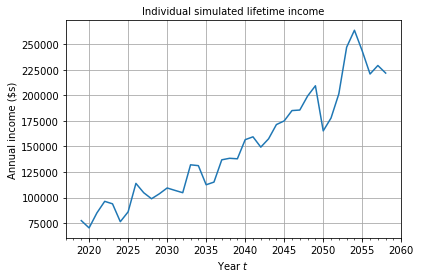

In [14]:
income = income_sim(inc0,g,mu,sigma,rho,w_years,num_draws)
%matplotlib inline
year_vec = np.arange(st_year, st_year + w_years)
fig, ax = plt.subplots()
plt.plot(year_vec, income[:, 1])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')  

In [15]:
#Q2:Plot a histogram with 50 bins of year t = 2019 initial income for each of the 10,000 simulations.
#What percent of your class will earn more than $100,000 in the first year out of the program? What
#percent of the class will earn less than $70,000? Is the distribution normally distributed (i.e. symmetric
#and bell-curved)?

In [17]:
#construct a function calculating an individual's income for 2019
def income_this_yr(inc0,g,mu,sigma,rho,num_draws):
    np.random.seed(5)
    random_errors = np.random.normal(mu, sigma, num_draws)
    inc = np.log(inc0)+random_errors
    incm = np.exp(inc)
    return incm

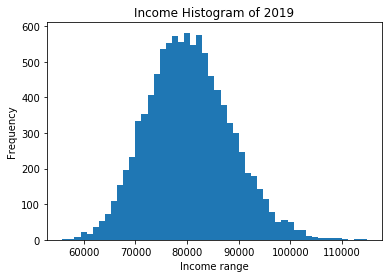

In [20]:
data = income_this_yr(inc0,g,mu,sigma,rho,num_draws)
plt.hist(data, bins=50)
plt.title("Income Histogram of 2019")
plt.xlabel("Income range")
plt.ylabel("Frequency")
plt.show()

In [24]:
stats.percentileofscore(data, 70000)

9.1099999999999994

In [26]:
100 - stats.percentileofscore(data, 100000)

1.1600000000000108

In [27]:
# About 1.16% student will earn more than 10,000 the first year, about 9.11% student will earn less than 70,000
# from the diagram above, it is normally distributed

In [28]:
#Q3: Suppose you graduate from the MACSS program with $95,000 of zero-interest debt. You
#will use 10% of your annual salary after you graduate to pay off this loan. Plot the histogram of how
#many years it takes to pay off the loan in each of your 10,000 simulations. This histogram will only
#have as many bins as you have unique years in which people pay off their debt. In what percent of the
#simulations are you able to pay off the loan in 10 years (on or before t = 2028)?

In [30]:
#construct a function to count years
def count_yr(debt,rate,mat):
    debt_mat = np.zeros(num_draws)
    for n in range(num_draws):
        curr_debt = debt
        for yr in range(w_years):
            curr_debt -= rate * mat[yr, n]
            if curr_debt <= 0:
                debt_mat[n] = yr + st_year
                break
    return debt_mat

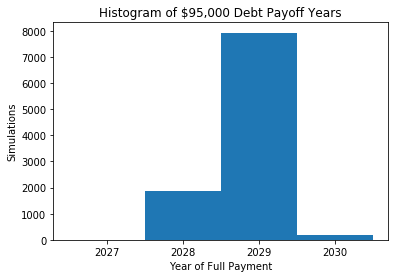

In [32]:
debt_mat = count_yr(95000,0.1,income)
plt.hist(debt_mat, 
         bins = np.arange(min(debt_mat)-.5, max(debt_mat) +1, 1))
plt.xlabel(r'Year of Full Payment')
plt.ylabel(r'Simulations')
plt.xticks(np.arange(debt_mat.min(), debt_mat.max() + 1))
plt.title('Histogram of \$95,000 Debt Payoff Years') 

In [33]:
percent = len(debt_mat[debt_mat < 2029])/len(debt_mat)
percent

0.1875

In [35]:
#In about 18.75 percent i can pay off the loan in 10 years

In [36]:
#Q4:Now suppose that the UChicago MACSS program becomes very well known in the next
#year, and the skills you are learning are demanded more by employers. This increases the average
#starting salary to inc0 = $85, 000, but the standard deviation in incomes increases also to σ = 0.15.
#Plot the new histogram of how many years it takes to pay off your loan of $95,000 in your new 10,000
#simulations with the new standard deviation and the new average initial salary. In what percent of the
#simulations are you able to pay off the loan in 10 years (on or before t = 2028)?

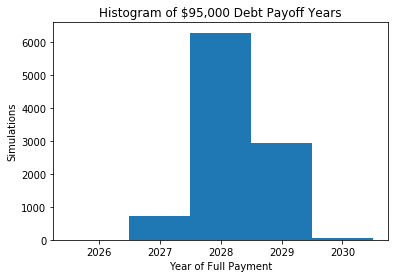

In [38]:
inc0=85000
sigma=0.15
new_income = income_sim(inc0,g,mu,sigma,rho,w_years,num_draws)
new_debt_mat = count_yr(95000,0.1,new_income)
plt.hist(new_debt_mat, 
         bins = np.arange(min(new_debt_mat)-.5, max(new_debt_mat) +1, 1))
plt.xlabel(r'Year of Full Payment')
plt.ylabel(r'Simulations')
plt.xticks(np.arange(new_debt_mat.min(), new_debt_mat.max() + 1))
plt.title('Histogram of \$95,000 Debt Payoff Years')   


In [44]:
percent = len(new_debt_mat[new_debt_mat < 2029])/len(new_debt_mat)
percent

0.702

In [42]:
#with the new distribution, there is 70.2 percent chance i can pay off my debt